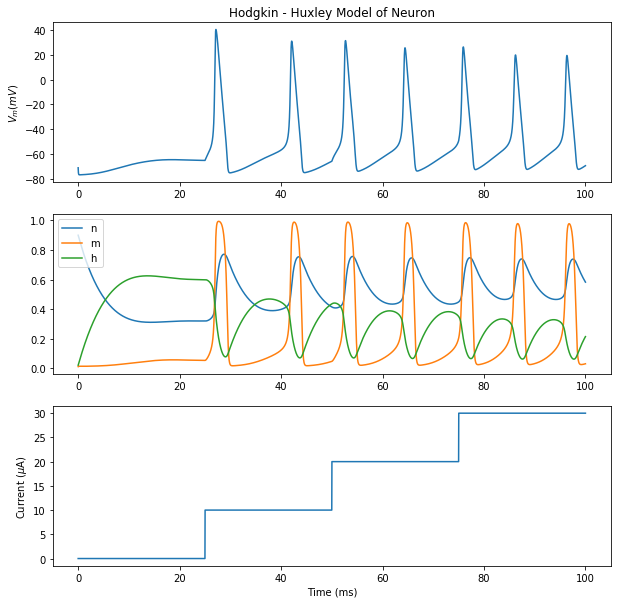

In [6]:
##Hogkin - Huxley Model
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Defining Constants
Cm = 1.0 #uF/sqcm
ENa = 50.0 #mV
EK = -77.0 #mV
Eleak = -54.387 #mV
gNa = 120.0 #mS/sqcm
gK = 36.0 #mS/sqcm
gleak = 0.3 #mS/sqcm

#Defining Functions:
def IK(V, n): #Potassium Current
    return gK*(V - EK)*n**4

def INa(V, m, h): #Sodium Current
    return gNa*h*(V - ENa)*m**3

def Ileak(V): #Leak Current
    return gleak*(V - Eleak)

def KParameters(V):  #Voltage dependent transition rate
    an = (0.01*(V + 55.0))/(1 - np.exp(-(V + 55.0)/10.0)) #alpha_n
    bn = 0.125*np.exp(-(V +65.0)/80.0)
    
    return an, bn

def NaParameters(V):
    am = (0.1*(V + 40.))/(1 - np.exp(-(V + 40.)/10.)) 
    bm = 4*np.exp(-(V + 65)/18)
    
    ah = 0.07*np.exp(-(V + 65.)/20.)
    bh = 1.0/((np.exp(-(V + 35.)/10.))+1)
    
    return am ,bm, ah, bh

def Iinj(t):  #INPUT CUURENT
    return 10*np.floor(t/25)

#State Function
def dXdt(X, t):
    V = X[0]
    n = X[1]
    m = X[2]
    h = X[3]
    
    an, bn = KParameters(V)
    am, bm, ah, bh = NaParameters(V)
    
    dVdt = (Iinj(t) - IK(V, n) - INa(V, m, h) - Ileak(V))/Cm
    dndt = an*(1-n) - bn*(n)
    dmdt = am*(1-m) - bm*(m)
    dhdt = ah*(1-h) - bh*(h)
    
    return dVdt, dndt, dmdt, dhdt  #Checkpoint!! Do not return X

#Defining Initial Conditions
y0 = np.array([-71., 0.9, 0.01, 0.02])
epsilon = 0.01
t = np.arange(0., 100., epsilon)
y = np.zeros((y0.shape[0], t.shape[0]))
y[:,0] = y0
I = [Iinj(t) for t in t]

#Integrating function
sol = odeint(dXdt, y0, t)

######PLOTTING###########

plt.figure(figsize=(10,10))

#Action Potential
plt.subplot(3,1,1)
plt.title("Hodgkin - Huxley Model of Neuron")
plt.plot(t, sol[:,0])
plt.ylabel('$V_{m}(mV)$')

#transition rates
plt.subplot(3,1,2)
plt.plot(t, sol[:,1], label = "n")
plt.plot(t, sol[:,2], label ="m")
plt.plot(t, sol[:,3], label = "h")
plt.legend()
plt.subplot(3,1,3)

#input Current
plt.plot(t, I)
plt.ylabel("Current ($\mu$A)")
plt.xlabel("Time (ms)")
plt.plot()
plt.show()
